## Подготовка

Пакеты

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Данные

Архив содержит файл gar_places.csv. Который содержит выгрузку части данных из архива ГАР.
Каждая строчка - это набор адресообразующих элементов какого-либо места (place) уровня до улиц.
Для каждого уникального значения кода ОКТМО выгружено по не более 10 примеров адресов мест.

In [2]:
!unzip -nq archive.zip

In [3]:
df = pd.read_csv("gar_places.csv")

In [4]:
df.head()

,region_name,region_type_name,region_type_name_short,mun_area_name,mun_area_type_name,mun_area_type_name_short,area_name,area_type_name,area_type_name_short,city_name,...,territory_type_name,territory_type_name_short,street_name,street_type_name,street_type_name_short,settlement_name,settlement_type_name,settlement_type_name_short,oktmo,oktmo_row_number
0,Алтайский,Край,край,Залесовский,Муниципальный округ,м.о.,Залесовский,Район,р-н,Залесово,...,NaN,NaN,Полевая,Улица,ул,NaN,NaN,NaN,1512000101,1
1,Алтайский,Край,край,Залесовский,Муниципальный округ,м.о.,Залесовский,Район,р-н,Залесово,...,Территория,тер.,151-й,Километр,км,NaN,NaN,NaN,1512000101,2
2,Алтайский,Край,край,Залесовский,Муниципальный округ,м.о.,Залесовский,Район,р-н,Залесово,...,NaN,NaN,Ворошилова,Улица,ул,NaN,NaN,NaN,1512000101,3
3,Алтайский,Край,край,Залесовский,Муниципальный округ,м.о.,Залесовский,Район,р-н,Залесово,...,NaN,NaN,Красноармейский,Переулок,пер,NaN,NaN,NaN,1512000101,4
4,Алтайский,Край,край,Залесовский,Муниципальный округ,м.о.,Залесовский,Район,р-н,Залесово,...,NaN,NaN,Гагарина,Улица,ул,NaN,NaN,NaN,1512000101,5


Удалим стролбцы, которые не нужны при последующем анализе данных

In [5]:
df = df.drop(['oktmo', 'oktmo_row_number', 'mun_area_name', 'mun_area_type_name', 'mun_area_type_name_short', 'settlement_name', 'settlement_type_name', 'settlement_type_name_short'], axis=1)

## Первичный анализ данных


### Незаполненные данные

In [6]:
for col in df.columns:
    s = df[col].isna().sum()
    if (s>0):
        print(f"{col} has NA values. count is {s}")

area_name has NA values. count is 54298
area_type_name has NA values. count is 54298
area_type_name_short has NA values. count is 54298
city_name has NA values. count is 23443
city_type_name has NA values. count is 23443
city_type_name_short has NA values. count is 23443
territory_name has NA values. count is 549196
territory_type_name has NA values. count is 549196
territory_type_name_short has NA values. count is 549196
street_name has NA values. count is 196075
street_type_name has NA values. count is 196075
street_type_name_short has NA values. count is 196075


In [7]:
df = df.fillna('')

### Базовые статистики
#### Число уникальных регионов

In [8]:
# Число уникальных регионов
df.region_name.nunique()

89

#### Типы адм. районов

In [9]:
# Типы адм. районов
df.area_type_name.value_counts()

area_type_name
Район        540940
              54298
Город         12551
Улус           4850
Поселение       191
Name: count, dtype: int64

#### Типы нас. пунктов
Самые частые названия типы населенных пунктов

In [10]:
df.city_type_name.value_counts().head()

city_type_name
Деревня    230217
Село       205180
Поселок     87267
            23443
Хутор       22496
Name: count, dtype: int64

In [11]:
# Самые редкие типы "нас. пунктов"
df.city_type_name.value_counts().tail()

city_type_name
Жилой район            2
Квартал                1
Сельский округ         1
Планировочный район    1
Леспромхоз             1
Name: count, dtype: int64

### Названия городов/поселков

Названия городов/поселков, которые содержат 2 и менее символов:

In [13]:
df.query('city_name.str.len()<=2').city_name.unique()

array(['', 'Ая', 'Ея', '18', '21', 'Ту', 'Иг', 'Ям', 'Яр', 'Яз', 'Ук',
       'Ут', 'Ей', 'Гу', 'Яя', 'Иж', 'Ик', 'Юг', 'Юм', 'Ур', 'Ис', '2А',
       '3', 'Ай', 'Уя', 'Ыб', 'Яг', 'Ир', 'Аю', 'Ий', 'Юр', 'Ой'],
      dtype=object)

#### Название территорий

In [14]:
df.query('territory_name.str.len()<=2').territory_name.unique()

array(['', '1', '4', '2', '3', '9', '11', '6', '10', 'N3', '27', '№6',
       '№1', '34', 'N8', 'N2', '59', '63', '89', '71', '91', '90', '40',
       '№4', '7', 'N4', 'N5', '22', '97', 'N1', '69', '80', '16', '17',
       'N7', 'N6', '№3', '№2', 'N9', '8', 'СК', 'ВС', '№9', '№8', '№7',
       '№5', '13', '5', '24', '28', '23', 'С1', 'Л2', 'С3', 'Л1', 'С2',
       'С5', 'Л4', 'С6', 'С4', 'Л3', 'С9', 'Г3', 'Л5', 'К1', 'Г2', '15',
       '12', 'СХ', '14', '18', '96', '19', '32', '48', '20', '21', '4а',
       '05', '03', '2А', '0', '30', '29', 'А', 'ЮГ', '81', '84', '25',
       '52', '75', '54', 'Ия', 'Яр', 'ГП', 'Юг', 'Б', 'В', 'Ёж', '98',
       '36', '2а', 'Ай', '47', '74', 'А5', 'Б5', 'А8', 'А2', 'А3', 'Б6',
       'Б1', 'Б4', 'А1', 'Л', '7а', 'Г', '44', '33', '49'], dtype=object)

In [16]:
def name_with_type(name, type, last_comma = True):
    if name=='':
        return ''
    else:
        return name + " " + type + (', ' if last_comma else '')

def adm_format(x):
    return name_with_type(x.region_name, x.region_type_name) \
        + name_with_type(x.area_name, x.area_type_name) \
        + name_with_type(x.city_name, x.city_type_name) \
        + name_with_type(x.territory_name, x.territory_type_name) \
        + name_with_type(x.street_name, x.street_type_name, False)



In [17]:
df['adm_div'] = df.apply(lambda x: adm_format(x), axis=1)

In [18]:
df.adm_div.sample(10)

375515    Псковская Область, Струго-Красненский Район, З...
455340    Тюменская Область, Исетский Район, Онуфриево Д...
178682                  Тверская Область, Чупрово Деревня, 
95        Алтайский Край, Залесовский Район, Никольский ...
6132      Алтайский Край, Поспелихинский Район, Гаврилов...
96283     Волгоградская Область, Урюпинский Район, Долго...
111268    Воронежская Область, Аннинский Район, 36:01:07...
568406    Татарстан Республика, Балтасинский Район, Норм...
30524     Красноярский Край, Новоселовский Район, Дивный...
198083    Кировская Область, Фаленский Район, Красное Се...
Name: adm_div, dtype: object

#### Длины полных наименований

In [19]:
df['adm_len'] = df.adm_div.str.len()

<Axes: >

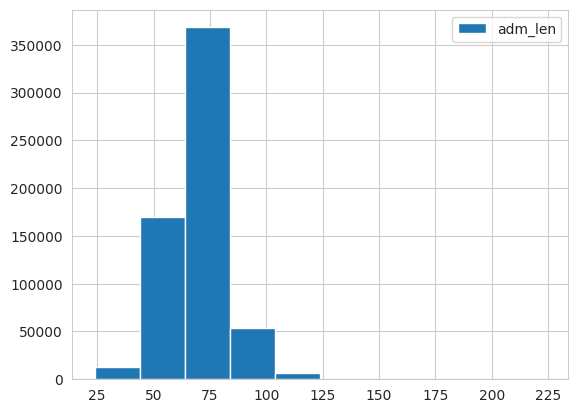

In [20]:
df.adm_len.hist(legend='y')

Длинные (больше 200 символов) названия мест в административно-территориальном делении

In [23]:
df.query('adm_len>200').adm_div

12249     Краснодарский Край, Гулькевичский Район, Мирны...
251039    Ленинградская Область, Кингисеппский Район, Мо...
461311    Ханты-Мансийский Автономный округ - Югра Автон...
461312    Ханты-Мансийский Автономный округ - Югра Автон...
461313    Ханты-Мансийский Автономный округ - Югра Автон...
Name: adm_div, dtype: object

#### Количество слов в адресе

In [24]:
df['adm_adr_word_count'] = df.adm_div.apply(lambda x: len(x.split()))

<Axes: >

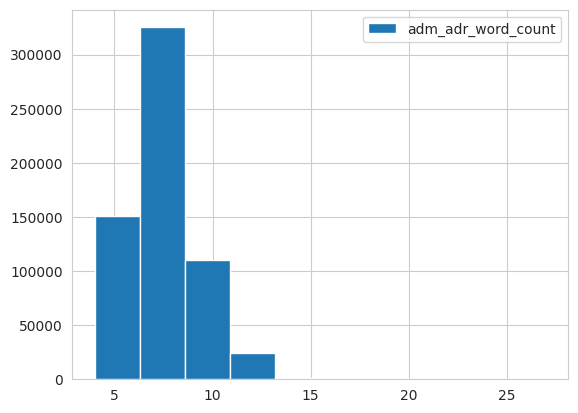

In [25]:
df.adm_adr_word_count.hist(legend='y')

In [27]:
df.adm_adr_word_count.mean()

7.787410864350636

### Конструируем новый датафрейм

In [32]:
df_mun = df[['mun_div']]
df_mun = df_mun.rename(columns={"mun_div": "name_full"})
df_mun = df_mun.assign(target=1)
df_mun.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 612830 entries, 0 to 612829
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   name_full  612830 non-null  object
 1   target     612830 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 9.4+ MB


In [33]:
df_div = pd.concat([df_adm, df_mun])

In [34]:
df_div.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1225660 entries, 0 to 612829
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   name_full  1225660 non-null  object
 1   target     1225660 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 28.1+ MB


Итак, получили датасет с 1,22 млн примеров адресов мест. Половина имеет признак 0 - адрес в административном делении.
Половина имеет признак 1 - адрес в муниципальном делении. Сохраним его для дальнейшей работы

In [44]:
df_div.to_csv('address_division.csv')

### Дополнительно. Справочники сокращений типов адресообразующих элементов

Дополнительно составим справочник сокращений. Он будет использоваться при аугментации данных - генерации возможных вариантов написания адреса.

In [36]:
mdf = df[['mun_area_type_name', 'mun_area_type_name_short']].copy()
mdf.drop_duplicates(inplace=True)
mdf = mdf.rename(columns={'mun_area_type_name': 'type_name', 'mun_area_type_name_short': 'type_name_short'})

In [37]:
sdf = df[['settlement_type_name', 'settlement_type_name_short']].copy()
sdf.drop_duplicates(inplace=True)
sdf = sdf.rename(columns={'street_type_name':'type_name', 'street_type_name_short': 'type_name_short'})

In [38]:
cdf = df[['city_type_name', 'city_type_name_short']].copy()
cdf.drop_duplicates(inplace=True)
cdf = cdf.rename(columns={'city_type_name':'type_name', 'city_type_name_short': 'type_name_short'})

In [39]:
tdf = df[['territory_type_name', 'territory_type_name_short']].copy()
tdf.drop_duplicates(inplace=True)
tdf = tdf.rename(columns={'territory_type_name': 'type_name', 'territory_type_name_short': 'type_name_short'})

In [40]:
sdf = df[['street_type_name', 'street_type_name_short']].copy()
sdf.drop_duplicates(inplace=True)
sdf = sdf.rename(columns={'street_type_name': 'type_name', 'street_type_name_short': 'type_name_short'})

In [41]:
adf = df[['area_type_name', 'area_type_name_short']].copy()
adf.drop_duplicates(inplace=True)
adf = adf.rename(columns={'area_type_name': 'type_name', 'area_type_name_short': 'type_name_short'})

In [42]:
rdf = df[['region_type_name', 'region_type_name_short']].copy()
rdf.drop_duplicates(inplace=True)
rdf = rdf.rename(columns={'region_type_name':'type_name', 'region_type_name_short': 'type_name_short'})

Объединяем все справочники в 1 чистим дубликаты и сохраняем в файл

In [43]:
types_df = pd.concat([adf, cdf, sdf, mdf, rdf, tdf, sdf])
types_df.drop_duplicates(inplace=True)
types_df.to_csv("types.csv")